# IMPORTS

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Importing dataset

In [73]:
tdf = pd.read_csv('titanic.csv')

Printing head

In [74]:
print(tdf.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

Simplifying dataset to apply PCA and get the relevant variances

In [75]:
tdf = tdf.select_dtypes(include='number')

Checking null values

In [76]:
tdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

Checking shape to see if nulls are too relevant

In [77]:
tdf.shape

(891, 7)

Dropping NA's

In [78]:
tdf = tdf.dropna()

Separating target from rest of dataset

In [79]:
X = tdf.drop('Fare', axis=1)
y = tdf['Fare']

Scaling data

In [80]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

Instantianting PCA and fitting data

In [81]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

In [82]:
pd.DataFrame(pca_data).head()

,0,1,2,3,4,5
0,1.044263,-1.194136,1.583756,-0.377640,-0.378175,-0.064611
1,-0.803007,1.525157,1.936760,-0.472817,-0.700637,-0.194647
2,0.084358,-0.149302,1.363897,-1.724465,0.592005,-0.815454
3,-0.688072,1.523653,1.891151,-0.589391,-0.727256,-0.079848
4,-0.037262,-1.478110,1.636563,-0.210246,0.431736,-0.217902


Checking the number of columns that explain the most variance

In [83]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90) + 1
print(f'Amount of components that explain 90% of variance: {n_components}')

Amount of components that explain 90% of variance: 5


Visualizing explained variance by component

<Axes: >

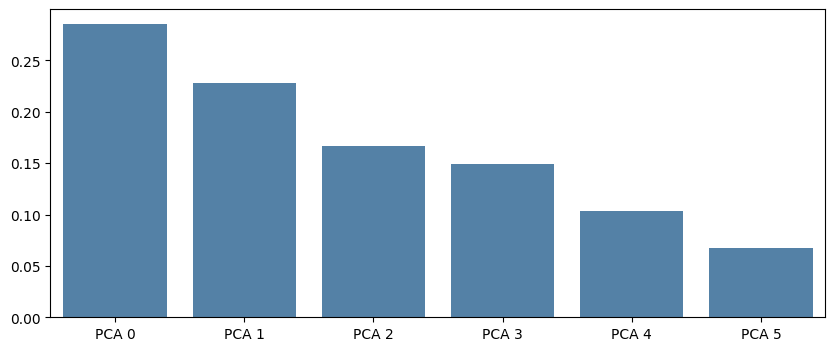

In [84]:
plt.figure(figsize=(10,4))
sns.barplot(x=[f'PCA {i}' for i in pd.DataFrame(pca_data).columns], y=pca.explained_variance_ratio_, color='steelblue')

PCA with the most explained variance

In [85]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)

In [86]:
pca_data = pd.DataFrame(data=pca_data, columns=[f'PC{x}' for x in range(0,5)])

In [87]:
print(pca_data.head(10))

        PC0       PC1       PC2       PC3       PC4
0  1.044263 -1.194136  1.583756 -0.377640 -0.378175
1 -0.803007  1.525157  1.936760 -0.472817 -0.700637
2  0.084358 -0.149302  1.363897 -1.724465  0.592005
3 -0.688072  1.523653  1.891151 -0.589391 -0.727256
4 -0.037262 -1.478110  1.636563 -0.210246  0.431736
5 -1.773893 -0.091309  2.189654  0.971873 -0.102011
6  3.484877 -0.146084  1.451925  0.025163 -1.166849
7  1.075878  0.801155  1.261028 -0.700369  2.170621
8  0.621148  0.824396  1.442258 -1.627824 -0.562124
9  2.024331  0.605497  1.105288 -1.746952  0.485925
